# CLINT WP5: how to get data, calculate climatologies and anomalies on DKRZ

### 2023/11/02 - ongoing

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import glob

## Rearrange longitude in files

Data are stored with longitude ranging between 0 and 360
With this function they are "translated" into -180 and 180

In [2]:
def rearrange_lon (xrdf):
    test = xrdf.assign_coords(lon=(((xrdf.lon + 180) % 360) - 180))
    test = test.sortby(test.lon)
    return(test)


## Crop netcdf

In [3]:
# def crop_xr (xrdf, lons, lats)
#     xrdf1 = xrdf.sel(lon=slice(lons[0],lons[1]), lat=slice(lats[0],lats[1])
#     return (xrdf1)

## Calculate climatology from list of files

In [4]:
#ERA5path = f"/work/bm1159/XCES/data4xces/reanalysis/reanalysis/ECMWF/IFS/ERA5/day/atmos/{var}/r1i1p1/"

In [5]:
# os.listdir(ERA5path)
#glob.glob(f"{ERA5path}{var}_{tres}_{product}_{experiment}_{ensemble}_*.nc")
#glob.glob(f"{ERA5path}{var}_{tres}_{product}_{experiment}_{ensemble}_*.nc")

In [6]:

def calc_clim (var,tres,product,experiment,ensemble,year_start,year_stop,path):
    list4clim = [f"{path}{var}_{tres}_{product}_{experiment}_{ensemble}_{y}0101-{y}1231.nc" for y in range(year_start,year_stop+1)]
    baseclim = xr.open_mfdataset(list4clim)
    xr_clim = baseclim.groupby("time.dayofyear").mean("time")
    return (xr_clim)

## Main

In [11]:
experiment = 'era5'
product = 'reanalysis'
var = 'tasmax'
tres = 'day'
ensemble = 'r1i1p1'
year_start = 1981
year_stop = 2010
ERA5_inpath = f"/work/bm1159/XCES/data4xces/reanalysis/reanalysis/ECMWF/IFS/ERA5/day/atmos/{var}/r1i1p1/"
ERA5_outpath = "/work/bk1318/b382649/ERA5/"


lons = [-14,46]
lats = [30,70]
path = ERA5_inpath
clim8110 = calc_clim(var,tres,product,experiment,ensemble,year_start,year_stop,path)
clim8110 = rearrange_lon(clim8110)
clim8110 = clim8110.sel(lon=slice(lons[0],lons[1]), lat=slice(lats[0],lats[1]))

In [12]:
# CRASHES THE KERNEL
clim8110.to_netcdf(f"{ERA5_outpath}{var}_{tres}_{product}_{experiment}_{ensemble}_clim8110_cropped.nc")

In [13]:
year = 2019
ERA5_inpath = f"/work/bm1159/XCES/data4xces/reanalysis/reanalysis/ECMWF/IFS/ERA5/day/atmos/{var}/r1i1p1/"
filename = f"{path}{var}_{tres}_{product}_{experiment}_{ensemble}_{year}0101-{year}1231.nc"
xrdf = xr.open_dataset(filename)
xrdf = rearrange_lon(xrdf)
xrdf_cr = xrdf.sel(lon=slice(lons[0],lons[1]), lat=slice(lats[0],lats[1]))


In [14]:
## TAKES VERY LONG TIME
xrdf_cr_anom = xrdf_cr.groupby("time.dayofyear") - clim8110

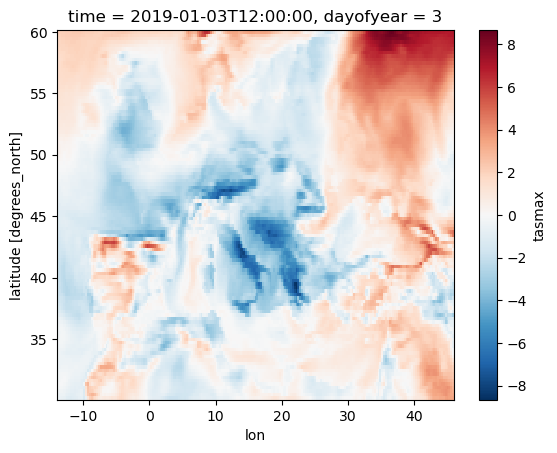

In [27]:
#xrdf_cr_anom.isel(time=2)['tasmax'].plot()

In [ ]:
xrdf_cropped_anom

In [11]:
test

<xarray.Dataset>
Dimensions:    (lon: 213, dayofyear: 366, bnds: 2, lat: 107)
Coordinates:
  * lon        (lon) float64 -13.78 -13.5 -13.22 -12.94 ... 45.28 45.56 45.84
  * lat        (lat) float64 30.21 30.49 30.77 31.05 ... 59.16 59.44 59.72 60.0
  * dayofyear  (dayofyear) int64 -9223372036854775806 ... -9223372036854775806
Dimensions without coordinates: bnds
Data variables:
    lon_bnds   (dayofyear, lon, bnds) float64 ...
    lat_bnds   (dayofyear, lat, bnds) float64 ...
    tasmax     (dayofyear, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.6 (http://mpimet.mpg.d...
    history:        Thu May 13 02:31:12 2021: cdo -f nc4 -s -z zip_9 -mergeti...
    institution:    European Centre for Medium-Range Weather Forecasts
    Conventions:    CF-1.6
    license:        Contains modified Copernicus Atmosphere Monitoring Servic...
    tracking_id:    d5b13485-16f3-5f65-8dfd-cf03615bcc01
    creation_date:  2021-05-12T12:51:08Z
    CDO:            Climate Data Operators version 1.9.6 (http://mpimet.mpg.d...